# map plotting

This notebook is intended to be used to inspect and plot healpix maps. 

In [1]:
%matplotlib inline
import os,sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
import fitsio
from astropy.io.fits.hdu.hdulist import HDUList
import healpy as hp
matplotlib.style.use('des_dr1')
workdir = '/Users/nsevilla/y3gold-paper/figs/'
datadir = '/Users/nsevilla/des/masks/'

In [2]:
#load Alex's skymap utilities
import skymap
from skymap import Skymap,McBrydeSkymap,OrthoSkymap
from skymap import SurveySkymap,SurveyMcBryde,SurveyOrtho
from skymap import DESSkymap

SKYMAPS = [Skymap,McBrydeSkymap,OrthoSkymap]
SURVEYS = [SurveySkymap,SurveyMcBryde,SurveyOrtho]


In [3]:
plt.rcParams['axes.labelsize'] = 60
plt.rcParams['axes.titlesize'] = 60
plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40
plt.rcParams['lines.linewidth'] = 3

In [4]:
NSIDE = 4096
pixarea = hp.nside2pixarea(NSIDE,degrees=True)

### Footprint Maps

In [11]:
footprints = []
data_files = []
cmaps = ['Spectral','summer','seismic']
labels = ['Y3','Y1','SV']
data_files.append(datadir+'y3a2_footprint_griz_1exp_v2.0.fits.gz')
data_files.append(datadir+'y1a1_gold_1.0.2_wide+d04_footprint_4096.fit')
data_files.append(datadir+'sva1_gold_1.0.4_goodregions_04_equ_nest_4096.fits')
for file in data_files:
    footprints.append(fitsio.read(file,ext=1)['I'].ravel())

In [12]:
print(len(footprints[0]),footprints[0])
print(len(footprints[1]),footprints[1])
print(len(footprints[2]),footprints[2])

201326592 [ 1.0000e+00  1.0000e+00  1.0000e+00 ... -1.6375e+30 -1.6375e+30
 -1.6375e+30]
201326592 [-1.6375e+30 -1.6375e+30 -1.6375e+30 ... -1.6375e+30 -1.6375e+30
 -1.6375e+30]
201326592 [0. 0. 0. ... 0. 0. 0.]


0


/anaconda2/envs/skymap/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


1


/anaconda2/envs/skymap/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


2


/anaconda2/envs/skymap/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Text([3.16838324], [0.77616385], 'SV')

/anaconda2/envs/skymap/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ["'serif'"] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


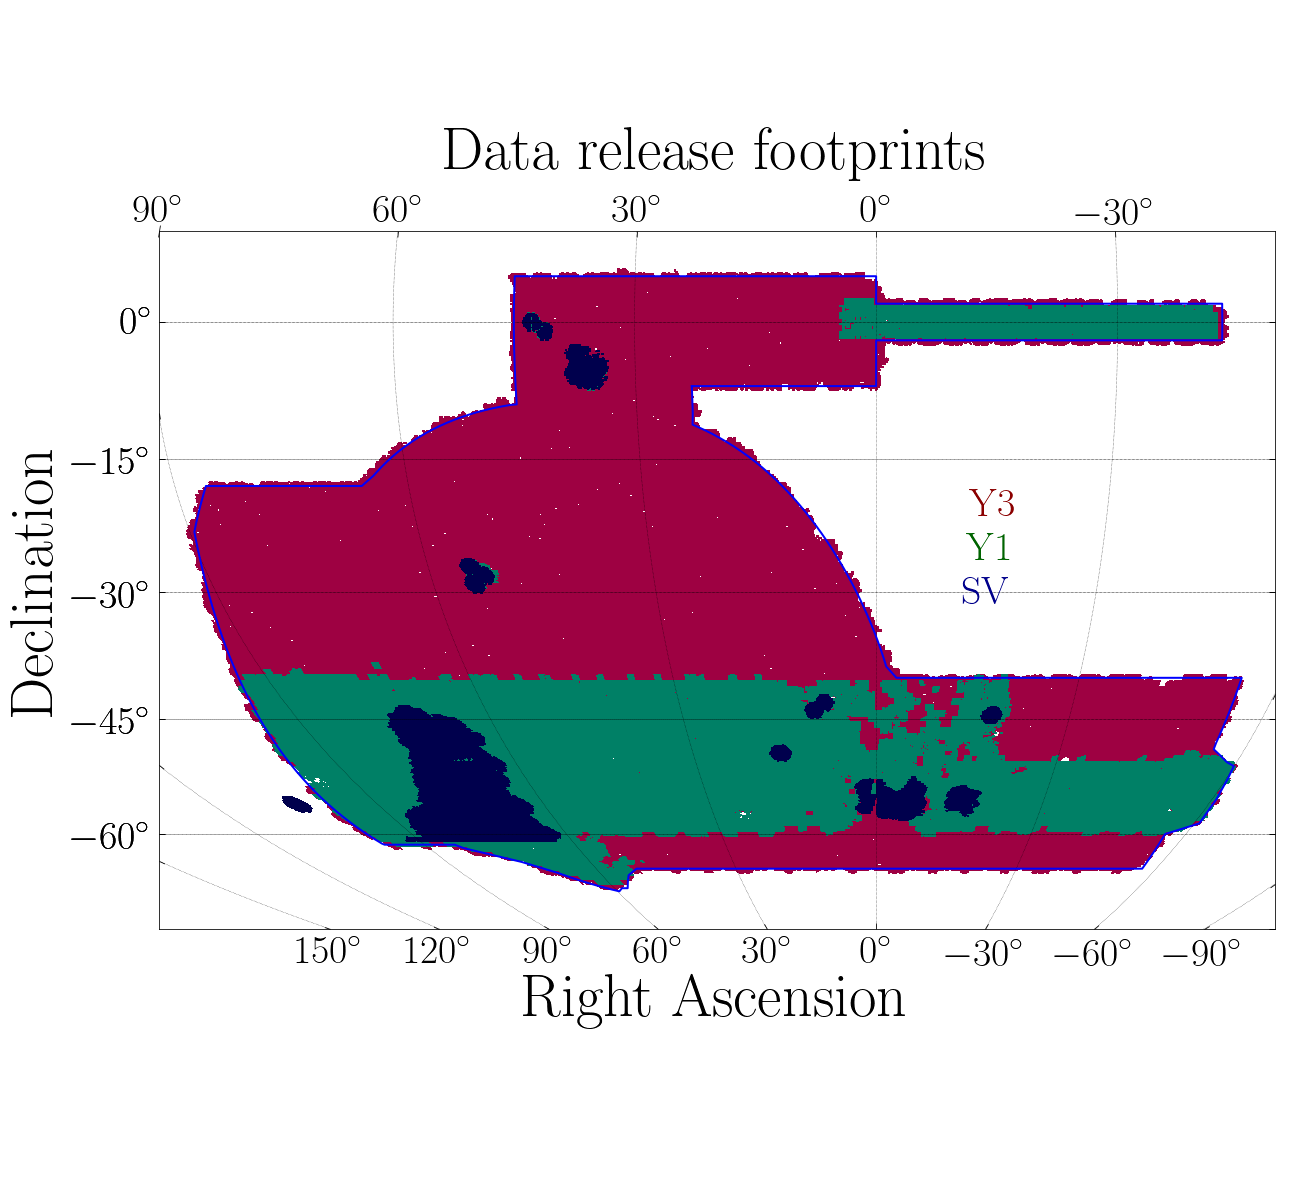

In [13]:
plt.figure(figsize=(20,20))
smap = DESSkymap() 
smap.draw_des()
plt.title('Data release footprints',y=1.08)

for f,foot in enumerate(footprints):
    print(f)
    mask, = np.where(foot>0)
    mapdata_tmp = hp.UNSEEN*np.ones(hp.nside2npix(NSIDE))
    mapdata_tmp[mask] = 1.0
    if f!=1:
        mapdata = hp.reorder(mapdata_tmp,n2r = True)
    else:
        mapdata = mapdata_tmp
    #if f>1:
    smap.draw_hpxmap(mapdata,xsize=1000,cmap=cmaps[f],label=labels[f])
    #plt.xlabel('Right Ascension',labelpad=2000000)
    #plt.savefig(workdir+'map_foreground_2.1_bit_all_test.png')


proj = smap.proj(-15,-20)
plt.text(proj[0],proj[1], 'Y3', weight='bold',
         fontsize=40, ha='center', va='center', color='darkred')
proj = smap.proj(-15,-25)
plt.text(proj[0],proj[1], 'Y1', weight='bold',
         fontsize=40, ha='center', va='center', color='darkgreen')
proj = smap.proj(-15,-30)
plt.text(proj[0],proj[1], 'SV', weight='bold',
         fontsize=40, ha='center', va='center', color='darkblue')

#plt.savefig(workdir+'footprints.png')

### Foreground Maps

In [10]:
print(mapdata_nest)
print(np.max(mapdata_nest))

[0 0 0 ... 0 0 0]
89


/anaconda2/envs/skymap/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


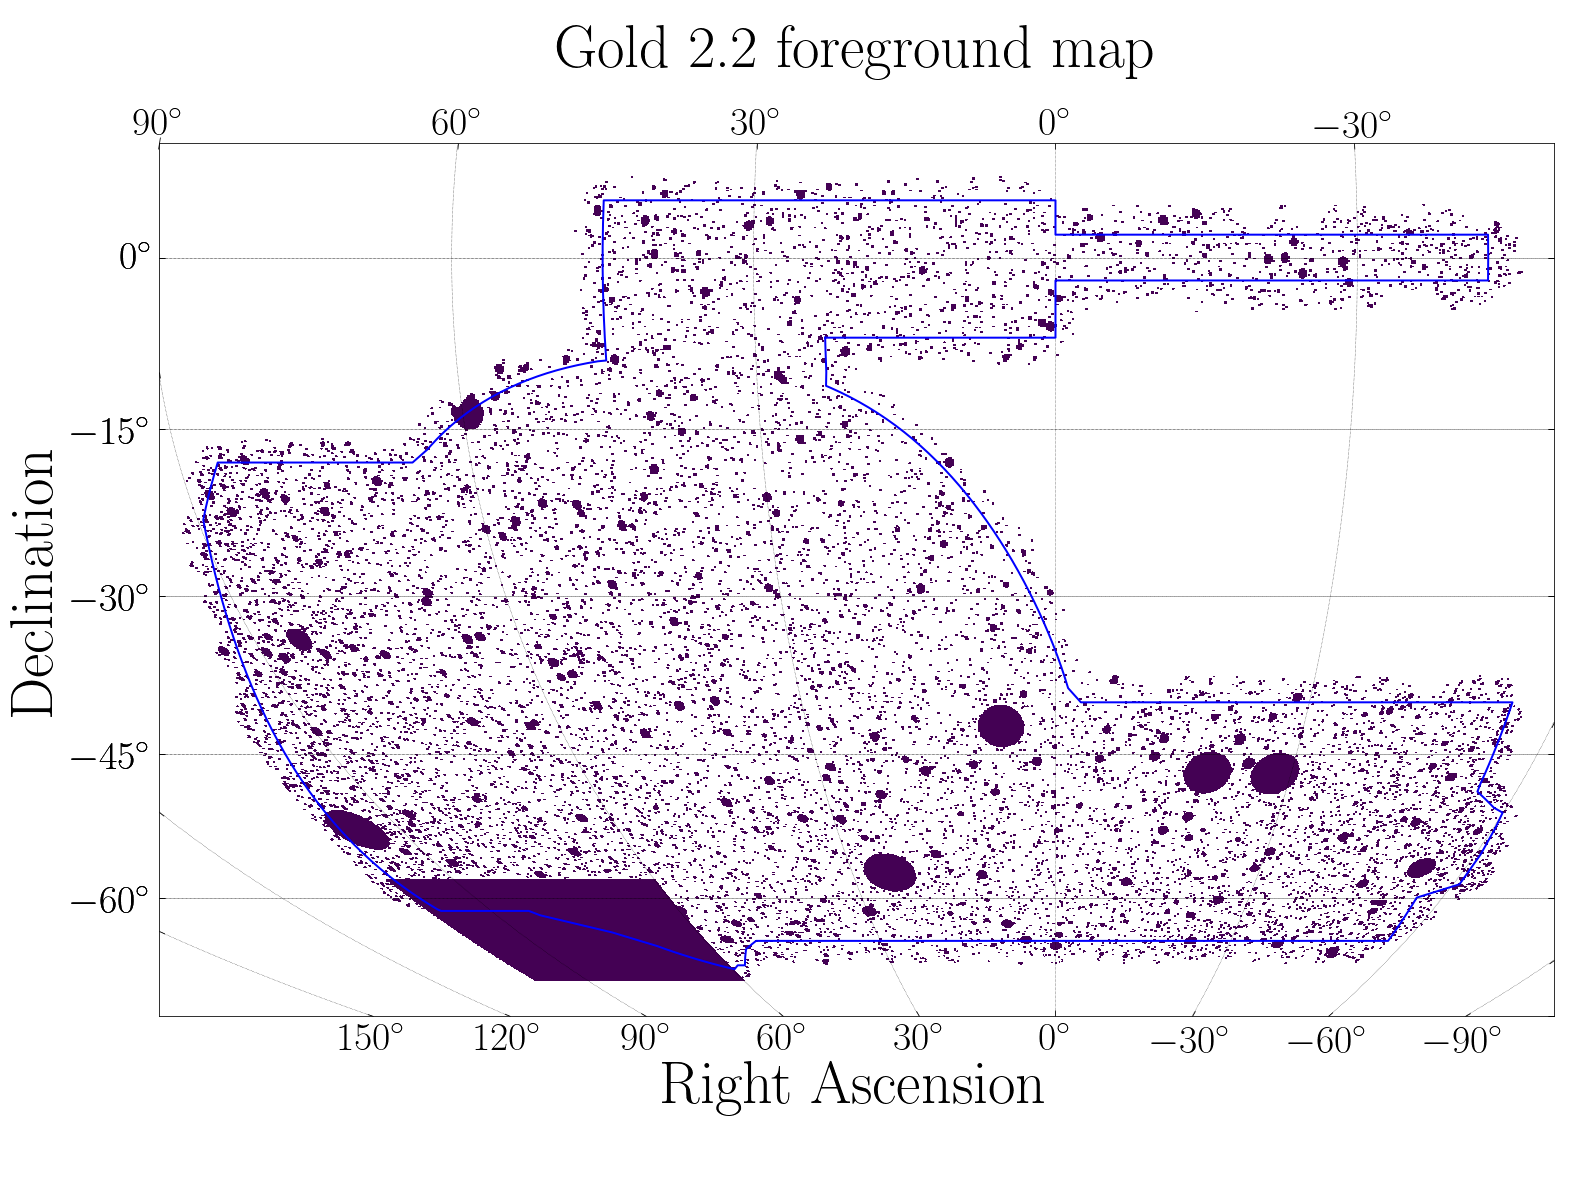

In [16]:
plt.figure(figsize=(25,20))
mapdata_nest = fitsio.read(datadir+'y3a2_foreground_mask_v2.1.fits',ext=1)['I'].ravel()
#bit = 64
#mask, = np.where(np.bitwise_and(mapdata_nest.astype(int),bit)>0)

smap = DESSkymap() 
## the following version allows different colors for each map
#cmaps = ['winter','viridis']#,'summer','autumn','spring','autumn']
#vals = [2,4,8,16,32,64]
#smap = DESSkymap() 
#for i in range(len(vals)):
#    mask, = np.where(mapdata_nest==vals[i])
#    mapdata_tmp = hp.UNSEEN*np.ones(hp.nside2npix(NSIDE))
#    mapdata_tmp[mask] = vals[i]
#    print(len(mapdata_tmp[mask])*pixarea)
#    mapdata = hp.reorder(mapdata_tmp,n2r = True)
#    smap.draw_hpxmap(mapdata,xsize=1000,cmap=cmaps[i])

mask, = np.where(mapdata_nest>1)
#mapdata_tmp = np.zeros(len(mapdata_nest))
mapdata_tmp = hp.UNSEEN*np.ones(hp.nside2npix(NSIDE))
mapdata_tmp[mask] = 1 #vals[i]
mapdata = hp.reorder(mapdata_tmp,n2r = True)
#hpxmap,(im,ra,dec,values) = smap.draw_hpxbin(ra,dec,nside=4096,xsize=3000)
smap.draw_hpxmap(mapdata,xsize=1000)

#smap.draw_inset_colorbar(fontsize=30)
smap.draw_des()
plt.title('Gold 2.2 foreground map',y=1.08)
plt.xlabel('Right Ascension')
plt.savefig(workdir+'map_foreground_2.1_bit_all_test.png')

In [6]:
print(len(mapdata_tmp[mask])*pixarea)

573.7865019828208
